In [113]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

In [80]:
df= pd.read_csv('BeerDataScienceProject.csv',  encoding='iso-8859-1')
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


## Some Basic Data quality checks

In [81]:
df.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
dtype: object

In [82]:
df['review_time']=pd.to_datetime(df['review_time'],unit='s')

In [83]:
df.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [84]:
df.isna().sum().values[0]/df.shape[0]

0.03834590731181576

In [85]:
df[df['beer_ABV'].isna()].groupby('beer_name')['beer_beerId'].count().reset_index().sort_values('beer_beerId',ascending=False)

,beer_name,beer_beerId
4402,Unplugged Berliner Weiss,241
3104,Oregon Golden Ale,209
814,Brewer Patriot Collection - George Washington ...,186
815,Brewer Patriot Collection - James Madison Dark...,177
4403,Unplugged Bohemian Lager,139
...,...,...
2207,HopCat Belgian Hoppopotamus,1
2208,HopCat Dictator,1
2209,HopWhompis,1
2210,Hopback Hopfest,1


In [86]:
df.groupby(['beer_name'])['beer_ABV'].nunique().reset_index().sort_values('beer_ABV',ascending=False).head(20)

,beer_name,beer_ABV
12295,Pale Ale,24
8519,India Pale Ale,18
8387,IPA,16
11755,Oatmeal Stout,14
11828,Oktoberfest,14
7531,Hefeweizen,13
10251,Maibock,13
7381,Harvest Ale,11
5318,ESB,11
8492,Imperial Stout,11


# Top 3 Breweries

[Text(0.5, 1.0, 'Top 3 Breweries'),
 Text(0.5, 0, 'Beer Alcohol by Volume in %'),
 Text(0, 0.5, 'Beer Name')]

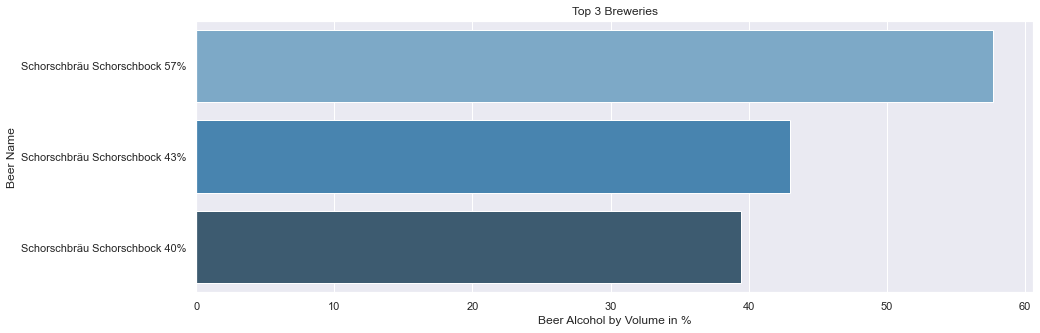

In [125]:
top_3_brew=df.groupby('beer_name')['beer_ABV'].mean().reset_index().sort_values('beer_ABV',ascending=False).head(3)
sns.barplot(y=top_3_brew.beer_name,x=top_3_brew.beer_ABV,palette="Blues_d").set(title='Top 3 Breweries', xlabel='Beer Alcohol by Volume in %', ylabel='Beer Name')

# Year with highest review

[Text(0.5, 1.0, 'Year with high reviews'),
 Text(0.5, 0, 'Avg yearly Review'),
 Text(0, 0.5, 'Year')]

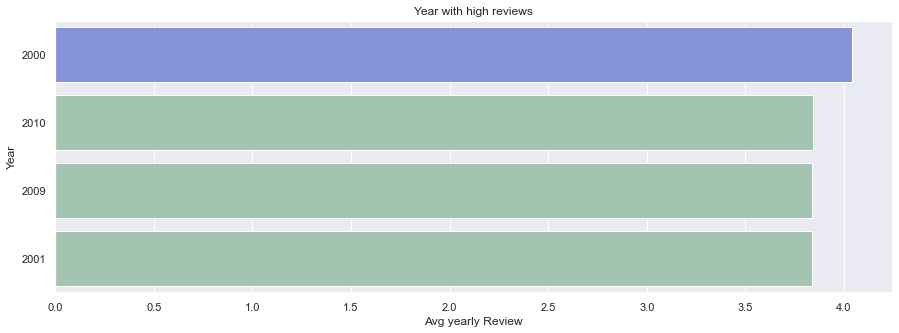

In [174]:
review_cols = ['review_appearance','review_palette','review_overall','review_taste','review_aroma']
df['review_final'] =df[review_cols].mean(1)
df['year'] = df['review_time'].dt.year
year =df.groupby('year')['review_final'].mean().reset_index().sort_values('review_final',ascending=False).head(4)

sns.barplot(y=year.year.astype(str),x=year.review_final,palette=['#778ce4','#9fc9b1','#9fc9b1','#9fc9b1']).set(title='Year with high reviews', xlabel='Avg yearly Review', ylabel='Year')

In [170]:
sns.light_palette("seagreen", reverse=True).as_hex()[-3]

'#9fc9b1'

## Review which is closest to overall review - Aroma

<AxesSubplot:>

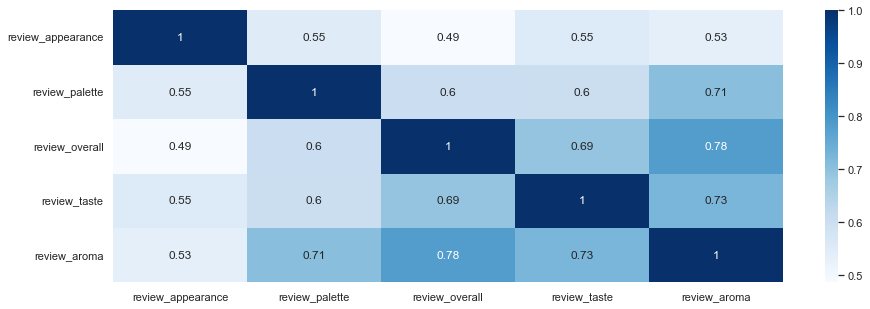

In [175]:
df[review_cols].corr()
sns.heatmap(df[review_cols].corr(), cmap="Blues", annot=True)

## Top 3 beers I would recommend my Friends

In [93]:
prods = df.groupby(['beer_name','beer_style'])['review_final'].agg(mean=('mean'),count=('count')).reset_index().sort_values(['mean','count'],ascending=False)
prods['score']= prods['mean']*prods['count']
prods.sort_values('score',ascending=False)
prods[prods['count']>1000].sort_values('mean',ascending=False).head(3)

,beer_name,beer_style,mean,count,score
15022,Sierra Nevada Celebration Ale,American IPA,4.148433,3000,12445.3
6291,Founders Breakfast Stout,American Double / Imperial Stout,4.404037,2502,11018.9
9734,La Fin Du Monde,Tripel,4.276883,2483,10619.5
15038,Sierra Nevada Pale Ale,American Pale Ale (APA),4.047777,2587,10471.6
15016,Sierra Nevada Bigfoot Barleywine Style Ale,American Barleywine,4.139125,2492,10314.7
...,...,...,...,...,...
9514,Kopparbergs Special Brew X-Strong 7.5%,Euro Strong Lager,1.000000,1,1.0
11838,NuBru Blend,American Pale Lager,1.000000,1,1.0
16228,Sunshine Coast Noosa Premium Ale,American Adjunct Lager,1.000000,1,1.0
16304,Swan MID,Light Lager,1.000000,1,1.0


[Text(0.5, 1.0, 'Top 3 beers I would Suggest my Friend'),
 Text(0.5, 0, 'Review score'),
 Text(0, 0.5, 'Beers with minimum 1000 reviews')]

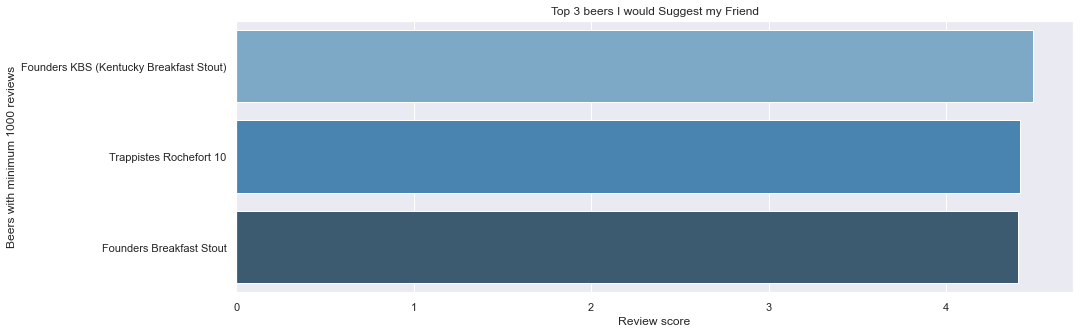

In [177]:
beers_3 =prods[prods['count']>1000].sort_values('mean',ascending=False).head(3)
sns.barplot(y=beers_3.beer_name,x=beers_3['mean'],palette="Blues_d").set(title='Top 3 beers I would Suggest my Friend', xlabel='Review score', ylabel='Beers with minimum 1000 reviews')

In [110]:
df['freq'] = df.groupby('beer_style')['beer_style'].transform('count')
df.groupby(['beer_style','freq'])['review_final'].mean().reset_index().sort_values('review_final',ascending=False).head(5)

,beer_style,freq,review_final
11,American Double / Imperial Stout,23354,4.197444
86,Quadrupel (Quad),4934,4.128739
63,Gueuze,1575,4.116762
89,Russian Imperial Stout,17192,4.113762
41,Eisbock,195,4.086667


In [111]:
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_final,year,freq
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03,1.8,2009,8553
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57,2.9,2009,1183
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04,2.9,2009,2217
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25,3.0,2009,5087
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26,4.2,2010,26106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",2008-03-11 05:18:41,3.7,2008,1183
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,2008-02-20 06:59:43,3.3,2008,1183
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,2008-01-26 04:14:57,4.2,2008,1183
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",2008-01-24 22:54:50,3.9,2008,1183
